## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import rsi_help as rh
nt = None  # default='warn'

## Fetching data

### name = name of the stock or cryptocurrency we want to fetch
### start = date to start fetching from
### end = date to finish fetching to

In [2]:
name = "NKLA"
start = "2020-01-01"
end = "2021-08-18"

data = yf.download(name,start,end)

[*********************100%***********************]  1 of 1 completed


## Creating Necessary Columns

In [3]:

data['Up Move'] = np.nan
data['Down Move'] = np.nan
data['Average Up'] = np.nan
data['Average Down'] = np.nan
    
    # Relative Strength
data['RS'] = np.nan

    # Relative Strength Index
data['RSI'] = np.nan


## Calculating RSI Values
### $RS = \frac{U}{D} $
### U = average number of positive price changes
### D = average number of negative price changes
## $RSI = 100.0 - \frac{100.0}{1.0+RS}$


In [4]:
def calculateRsi(data):
    data = rh.fillMoves(data)
    for _day in range (1,len(data)):
        if(~(data['Down Move'][_day]>0)):
            data['Down Move'][_day]=0
    data = rh.fillRsi(data)
    return data

data = calculateRsi(data)

## Plotting

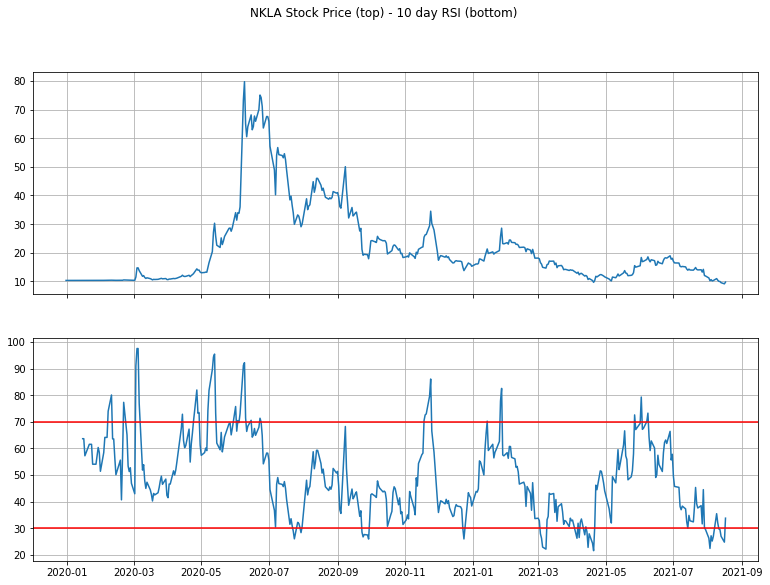

In [5]:
import matplotlib.pyplot as plt

rh.pltRsi(data)

## BUY AND SELL SIGNALS

In [25]:
# Calculate the buy & sell signals
## Initialize the columns that we need
data['Long Tomorrow'] = np.nan
data['Buy Signal'] = np.nan
data['Sell Signal'] = np.nan
data['Buy RSI'] = np.nan
data['Sell RSI'] = np.nan
data['Strategy'] = np.nan

### Generate Buy&Sell signals

In [26]:

data = rh.calculateSignals(data)

### Signal plotting (Exit / Entry)

,Open,High,Low,Close,Adj Close,Volume,Up Move,Down Move,Average Up,Average Down,RS,RSI,Long Tomorrow,Buy Signal,Sell Signal,Buy RSI,Sell RSI,Strategy
Date,,,,,,,,,,,,,,,,,,
2019-12-31,10.317,10.320,10.315,10.32,10.32,6500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,10.310,10.320,10.310,10.32,10.32,60300,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,10.300,10.300,10.300,10.30,10.30,15000,0.000000,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,10.325,10.350,10.320,10.32,10.32,68700,0.020000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,10.440,10.440,10.330,10.33,10.33,42900,0.010000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11,10.450,10.450,9.910,10.00,10.00,21487200,0.000000,0.40,0.166691,0.393686,0.423410,29.746162,1.0,NaN,NaN,NaN,NaN,8.671490
2021-08-12,10.140,10.183,9.830,9.95,9.95,13750600,0.000000,0.05,0.150021,0.359317,0.417518,29.454153,1.0,NaN,NaN,NaN,NaN,8.628132
2021-08-13,9.960,9.970,9.360,9.53,9.53,17614100,0.000000,0.42,0.135019,0.365386,0.369525,26.982007,1.0,NaN,NaN,NaN,NaN,8.263930


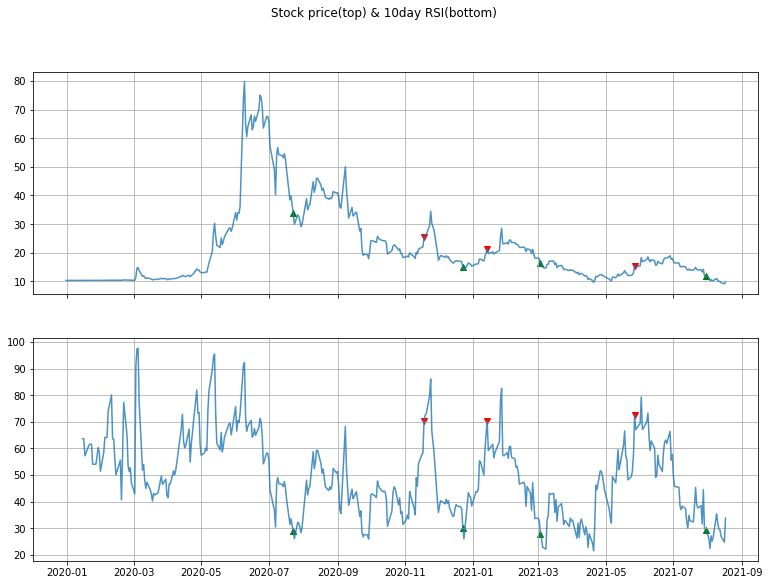

In [27]:

rh.pltSignals(data)

## Perfomance:

In [28]:
## Trade Performance
trade_count = data['Buy Signal'].count()

## Avg Profit per trade

average_profit = ((data['Strategy'][-1] / data['Strategy'][11]) ** (1/trade_count)) - 1

## Number of days per trade
total_days = data['Long Tomorrow'].count()
average_days = int(total_days/trade_count)

print('Strategy yield', trade_count, 'trades')
print('Avrage trade lasted', average_days, 'days per trade')
print('Average profit per trade was', average_profit*100, '%')

Strategy yield 4 trades
Avrage trade lasted 100 days per trade
Average profit per trade was -4.9796676607325345 %


In [29]:
data.to_excel("RSI_data_table.xlsx")